In [1]:
import pandas as pd
train = pd.read_csv("cleaned_train_tokens.csv")
train_token = train.no_punc
##This part is altered when the tokens change

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens

In [4]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=20)
estimator = [("counts",CountVectorizer(lowercase = False)),("tfidf",TfidfTransformer()),("lr",lr)]
pipeline = Pipeline(estimator)
pipeline.fit(train_token,train.rating)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('counts', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(max_iter=20))])

In [7]:
import numpy as np
test = pd.read_csv("cleaned_test_tokens.csv")
test_tokens = test.no_punc
test_predicted = []

In [10]:
pred_prob = pipeline.predict_proba(test_tokens)
zero = []
one = []
for i in pred_prob:
    zero.append(i[0])
    one.append(i[1])
    if (i[1]>= .6):
        test_predicted.append(1)
    else:
        test_predicted.append(0)

In [ ]:
import csv 
    
# field names 
fields = ["id","rating","prob_0","prob_1"]
    
# name of csv file 
filename = "no_punc_output.csv"
  
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    
    # writing the fields 
    csvwriter.writerow(fields)  
    csvwriter.writerows(zip(test.id,test_predicted,zero,one)) 

In [9]:
train_acc =[]
test_acc =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 21)]

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)
    #calculate loss   
    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)
    


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [1]:
print("No Punc: Accuracy\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_acc[i-1], test_acc[i-1]))

No Punc: Accuracy



NameError: name 'values' is not defined

In [3]:
print("No Punc: Loss\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

No Punc: Loss



NameError: name 'values' is not defined

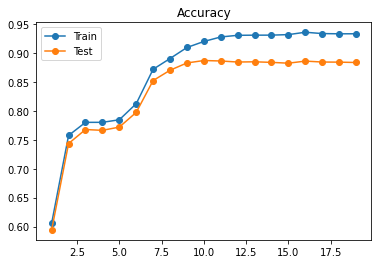

In [56]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_acc, '-o', label='Train')
pyplot.plot(values, test_acc, '-o', label='Test')
pyplot.legend()
pyplot.savefig("no_punc_accuracy.png",dpi=1200)
pyplot.show()

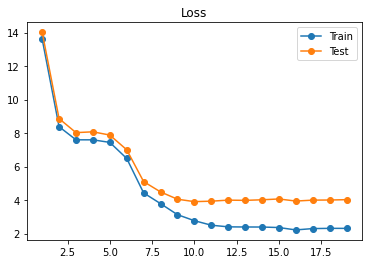

In [57]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.savefig("no_punc_loss.png",dpi=1200)
pyplot.show()

In [ ]:
###ignore below here##

In [270]:
#from sklearn.metrics import accuracy_score, classification_report

In [266]:
#y_predict = lr.predict(X_test)
##we will change this line when running to the test file after adjusting the max_iter

In [267]:
##print('Logistic Regression Train accuracy %s' % lr.score(X_train, y_train)) #Train accuracy
#print('Logistic Regression Test accuracy %s' % accuracy_score(y_predict, y_test)) #Test=Validation accuracy

Logistic Regression Train accuracy 0.93305
Logistic Regression Test accuracy 0.883
